In [2]:
import time
import email

import os; 
from os import listdir
from os.path import join, isdir

import pandas as pd
import swifter

import matplotlib.pyplot as plt

In [2]:
start = time.time()

all_mails = pd.read_csv("/media/becode/3D_House/Enron_CSV/all_mails.csv", index_col = 0)

print("Took:", round(time.time()-start, 2), "seconds.")

/home/becode/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Took: 18.5 seconds.


In [35]:
def open_and_save(target):
    if isdir(target):
        for item in listdir(target):
            open_and_save(join(target, item))
    else:
        with open(target, "r", errors="ignore") as text:
            try: mails.append(email.message_from_string(text.read()))
            except: print("ERROR:", target)

abs_start = start = time.time()

mails = []
path = "/media/becode/3D_House/Enron/"
for idx, user in enumerate([user for user in listdir(path) if isdir(join(path, user))]):
    for folder in listdir(join(path, user)):
        open_and_save(join(path, user, folder))
        
    print(f"{idx}. {user} took:", round(time.time()-start, 2), "seconds.")
    start = time.time()        
print("Total lookup took:", round(time.time()-abs_start, 2), "seconds.")

0. dickson-s took: 0.34 seconds.
1. stclair-c took: 0.59 seconds.
2. guzman-m took: 1.33 seconds.
3. kuykendall-t took: 0.22 seconds.
4. saibi-e took: 0.23 seconds.
5. keiser-k took: 0.26 seconds.
6. harris-s took: 0.11 seconds.
7. lavorato-j took: 0.89 seconds.
8. campbell-l took: 1.31 seconds.
9. sanchez-m took: 0.05 seconds.
10. arnold-j took: 1.05 seconds.
11. pimenov-v took: 0.17 seconds.
12. fischer-m took: 0.3 seconds.
13. sturm-f took: 0.26 seconds.
14. weldon-c took: 0.34 seconds.
15. shankman-j took: 0.86 seconds.
16. ruscitti-k took: 0.37 seconds.
17. dean-c took: 0.61 seconds.
18. thomas-p took: 0.34 seconds.
19. keavey-p took: 0.52 seconds.
20. merriss-s took: 0.46 seconds.
21. mccarty-d took: 0.15 seconds.
22. zufferli-j took: 0.12 seconds.
23. davis-d took: 0.45 seconds.
24. ward-k took: 0.56 seconds.
25. brawner-s took: 0.22 seconds.
26. hernandez-j took: 0.79 seconds.
27. taylor-m took: 3.18 seconds.
28. mann-k took: 4.84 seconds.
29. rodrique-r took: 0.49 seconds.
30.

In [38]:
start = time.time()

all_mails = pd.DataFrame()
all_mails["Content"] = list(map(lambda x: x.get_payload(), mails))

print("Took:", round(time.time()-start, 2), "seconds.")

Took: 2.36 seconds.


In [42]:
start = time.time()

fields = mails[0].keys()
for field in fields:
    all_mails[field] = [mail[field] for mail in mails]
    
print("Took", round(time.time() -start, 2), "seconds")

Took 18.76 seconds


In [96]:
start = time.time()

all_mails["Date"] = all_mails["Date"].apply(lambda x: x[5:-12])
all_mails["Date"] = all_mails["Date"].apply(pd.to_datetime)

print("Took", round(time.time() -start, 2), "seconds")

Took 149.49 seconds


In [88]:
all_mails.to_csv("all_mails.csv")

### Emails before founding date

In [107]:
all_mails[all_mails["Date"].apply(lambda x: x.year < 1985)]["Date"].apply(lambda x: x.year).value_counts()

1979    522
Name: Date, dtype: int64

### Emails later than 2002

In [105]:
all_mails[all_mails["Date"].apply(lambda x: x.year > 2002)]["Date"].apply(lambda x: x.year).value_counts()

2004    70
2044     3
2020     2
2012     2
2043     1
2024     1
2007     1
2005     1
Name: Date, dtype: int64

### Remove outliers date-wise

In [126]:
date_outliers_idx = []
date_outliers_idx.extend(all_mails[all_mails["Date"].apply(lambda x: x.year < 1985)].index)
date_outliers_idx.extend(all_mails[all_mails["Date"].apply(lambda x: x.year > 2002)].index)
all_mails.drop(date_outliers_idx, inplace=True)

In [152]:
start = time.time()

all_mails["Content"].apply(lambda x: x == all_mails.loc[0, "Content"])

print("Took", round(time.time() -start, 2), "seconds")

516798
Took 4.74 seconds


In [170]:
start = time.time()

print(all_mails["From"].apply(lambda x: "@enron" in x).sum())

print("Took", round(time.time() -start, 2), "seconds")

427366
Took 0.22 seconds


### Folder contents

In [182]:
all_mails["Folder"] = all_mails["X-Folder"].apply(lambda x: x.split("\\") if not pd.isnull(x) else x)

In [57]:
all_mails["X-Origin"]

0         Dickson-S
1         Dickson-S
2         Dickson-S
3         Dickson-S
4         Dickson-S
            ...    
517396    PLATTER-P
517397    PLATTER-P
517398    PLATTER-P
517399    PLATTER-P
517400    PLATTER-P
Name: X-Origin, Length: 517401, dtype: object

In [76]:
all_mails[all_mails["X-Origin"]=="Dickson-S"].index[1:]

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            385, 386, 387, 388, 389, 390, 391, 392, 393, 394],
           dtype='int64', length=394)

In [92]:
import numpy as np

In [109]:
sum(vectorize([w for w in tokenizer.tokenize(all_mails.loc[10, "Content"]) if w not in stop_words])).sum()

-20.754984

# Reduce

In [30]:
all_mails.drop(all_mails[all_mails["X-Origin"].apply(lambda x: type(x)==float)].index, inplace=True)

In [31]:
all_mails["X-Origin"] = all_mails["X-Origin"].apply(lambda x: x.lower())

### Manual fix X-Origin type-o

In [52]:
path = "/media/becode/3D_House/Enron/"
list(zip(sorted(listdir(path)), sorted(all_mails["X-Origin"].unique())))

[('allen-p', 'allen-p'),
 ('arnold-j', 'arnold-j'),
 ('arora-h', 'arora-h'),
 ('badeer-r', 'badeer-r'),
 ('bailey-s', 'bailey-s'),
 ('bass-e', 'bass-e'),
 ('baughman-d', 'baughman-d'),
 ('beck-s', 'beck-s'),
 ('benson-r', 'benson-r'),
 ('blair-l', 'blair-l'),
 ('brawner-s', 'brawner-s'),
 ('buy-r', 'buy-r'),
 ('campbell-l', 'campbell-l'),
 ('carson-m', 'carson-m'),
 ('cash-m', 'cash-m'),
 ('causholli-m', 'causholli-m'),
 ('corman-s', 'corman-s'),
 ('crandell-s', 'crandell-s'),
 ('cuilla-m', 'cuilla-m'),
 ('dasovich-j', 'dasovich-j'),
 ('davis-d', 'davis-d'),
 ('dean-c', 'dean-c'),
 ('delainey-d', 'delainey-d'),
 ('derrick-j', 'derrick-j'),
 ('dickson-s', 'dickson-s'),
 ('donoho-l', 'donoho-l'),
 ('donohoe-t', 'donohoe-t'),
 ('dorland-c', 'dorland-c'),
 ('ermis-f', 'ermis-f'),
 ('farmer-d', 'farmer-d'),
 ('fischer-m', 'fischer-m'),
 ('forney-j', 'forney-j'),
 ('fossum-d', 'fossum-d'),
 ('gang-l', 'gang-l'),
 ('gay-r', 'gay-r'),
 ('geaccone-t', 'geaccone-t'),
 ('germany-c', 'germany-c'),

In [54]:
all_mails["X-Origin"] = all_mails["X-Origin"].apply(lambda x: "zufferli-j" if x == "zufferlie-j" else x)

In [59]:
all_mails.sort_values(["X-Origin", "Date"], ascending=[True, True], inplace=True)

In [55]:
print(len(listdir(path))); print(len(all_mails["X-Origin"].unique()))
folders = listdir(path)
for bar in all_mails["X-Origin"].unique():
    if bar not in folders: print(bar)

150
150


In [8]:
all_mails = pd.read_csv("/media/becode/3D_House/Enron_CSV/all_mails.csv", index_col=0)

/home/becode/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [81]:
all_mails["Date"] = all_mails["Date"].swifter.apply(lambda x: pd.to_datetime(x[5:-12]))

In [99]:
all_mails.to_csv("/media/becode/3D_House/Enron_CSV/all_mails.csv")

# Reduce Loop

In [107]:
dfs = []
abs_start = start = time.time()
for idx, user in enumerate(all_mails["X-Origin"].unique()):
    df = pd.DataFrame(all_mails[all_mails["X-Origin"]==user][
        ["Content", "Date", "From", "To", "Subject", "X-Folder"]])
    
    df["Words"] = df["Content"].apply(lambda x: 
      [w for w in tokenizer.tokenize(x) if w not in stop_words])
    
    df.drop(df[df["Words"].apply(lambda x: len(x) > 10000)].index, inplace=True)
    
    df["VecSum"] = df["Words"].apply(lambda x:
        sum(vectorize(x)).sum() if type(sum(vectorize(x))) != int else sum(vectorize(x)))
    
    drop_idxs = []
    for vec in df["VecSum"].unique():
        similar = df[df["VecSum"] == vec]
        for date in similar["Date"].unique():
            drop_idxs.extend(similar[similar["Date"] == date].index[1:])
    
    df.drop(drop_idxs, inplace=True)
    df["Author"] = [user for i in range(len(df))]
    dfs.append(df); del(df)
    
    print(idx +1, "/", len(all_mails["X-Origin"].unique()),
          user, "took", round(time.time() -start, 2), "seconds.")
    start = time.time()
    
reduced = pd.concat(dfs)
print("Total time taken:", round(time.time() -abs_start, 2)/60, "minutes.")

del(dfs)
reduced

1 / 150 allen-p took 6.59 seconds.
2 / 150 arnold-j took 14.74 seconds.
3 / 150 arora-h took 3.07 seconds.
4 / 150 badeer-r took 2.39 seconds.
5 / 150 bailey-s took 1.65 seconds.
6 / 150 bass-e took 26.0 seconds.
7 / 150 baughman-d took 10.66 seconds.
8 / 150 beck-s took 26.0 seconds.
9 / 150 benson-r took 2.54 seconds.
10 / 150 blair-l took 9.59 seconds.
11 / 150 brawner-s took 2.58 seconds.
12 / 150 buy-r took 6.39 seconds.
13 / 150 campbell-l took 17.89 seconds.
14 / 150 carson-m took 3.74 seconds.
15 / 150 cash-m took 9.6 seconds.
16 / 150 causholli-m took 3.5 seconds.
17 / 150 corman-s took 7.88 seconds.
18 / 150 crandell-s took 2.13 seconds.
19 / 150 cuilla-m took 5.78 seconds.
20 / 150 dasovich-j took 138.78 seconds.
21 / 150 davis-d took 4.81 seconds.
22 / 150 dean-c took 11.98 seconds.
23 / 150 delainey-d took 7.22 seconds.
24 / 150 derrick-j took 5.73 seconds.
25 / 150 dickson-s took 0.64 seconds.
26 / 150 donoho-l took 3.15 seconds.
27 / 150 donohoe-t took 3.23 seconds.
28 /

,Content,Date,From,To,Subject,X-Folder,Words,VecSum,Author
254576,---------------------- Forwarded by Phillip K ...,2000-09-01 06:08:00,phillip.allen@enron.com,"mike.grigsby@enron.com, frank.ermis@enron.com",FYI,\Phillip_Allen_Dec2000\Notes Folders\Discussio...,"[Forwarded, Phillip, K, Allen, HOU, ECT, 09, 0...",145.607574,allen-p
254452,"Naomi,\n\nThe two analysts that I have had con...",1999-12-10 07:00:00,phillip.allen@enron.com,naomi.johnston@enron.com,NaN,\Phillip_Allen_Dec2000\Notes Folders\Discussio...,"[Naomi, The, two, analysts, I, contact, Matt, ...",-2.095150,allen-p
254553,---------------------- Forwarded by Phillip K ...,2000-02-11 04:31:00,phillip.allen@enron.com,keith.holst@enron.com,RE: W basis quotes,\Phillip_Allen_Dec2000\Notes Folders\Discussio...,"[Forwarded, Phillip, K, Allen, HOU, ECT, 02, 1...",417.837555,allen-p
254418,---------------------- Forwarded by Phillip K ...,2000-02-11 07:39:00,phillip.allen@enron.com,mike.grigsby@enron.com,Western Strategy Briefing,\Phillip_Allen_Dec2000\Notes Folders\Discussio...,"[Forwarded, Phillip, K, Allen, HOU, ECT, 02, 1...",116.993492,allen-p
254533,Dear Associate / Analyst Committee:\n\nThe fo...,2001-05-11 09:54:00,alyse.herasimchuk@enron.com,"phillip.allen@enron.com, robina.barker-bennett...","""Save the Date"" - Associate / Analyst Program",\Phillip_Allen_June2001\Notes Folders\Discussi...,"[Dear, Associate, Analyst, Committee, The, fol...",50.773918,allen-p
...,...,...,...,...,...,...,...,...,...
48832,\nq2 traded away 32 watt ex no credit otc \nq...,2002-01-09 07:19:11,cramer@cadvision.com,john.zufferli@enron.com,trade tuesday jan 8,"\ExMerge - Zufferli, John\Inbox\Quotes","[q2, traded, away, 32, watt, ex, credit, otc, ...",31.143114,zufferli-j
48522,Enron Canada Power Corp acknowledges the chang...,2002-01-09 07:30:16,john.zufferli@enron.com,carol.moline@powerpool.ab.ca,Chevron Contract,"\ExMerge - Zufferli, John\Sent Items","[Enron, Canada, Power, Corp, acknowledges, cha...",116.660645,zufferli-j
48781,This email is acknowledgement from the Power P...,2002-01-09 08:32:34,carol.moline@powerpool.ab.ca,slfr@chevrontexaco.com,Power Pool,"\ExMerge - Zufferli, John\Inbox","[This, email, acknowledgement, Power, Pool, Al...",485.660370,zufferli-j
48586,Nella here is a list of products that we would...,2002-01-09 09:46:43,john.zufferli@enron.com,nella.cappelletto@enron.com,Products,"\ExMerge - Zufferli, John\Sent Items","[Nella, list, products, would, launch, EOL, NE...",28.633648,zufferli-j


In [112]:
reduced.to_csv("/media/becode/3D_House/Enron_CSV/reduced_mails_FINAL.csv")

In [16]:
df[df["VecSum"] == df.loc[393, "VecSum"]]

,Content,Author,Words,VecSum
29,"Gregg, \n\nAs we discussed... I would add the ...",Dickson-S,"[Gregg, As, discussed, I, would, add, followin...",142.491852
393,"Gregg, \n\nAs we discussed... I would add the ...",Dickson-S,"[Gregg, As, discussed, I, would, add, followin...",142.491852


In [17]:
reduced["Words"].apply(len).max()

2163752

In [238]:
reduced.loc[0, "Words"]

0    [MVC, 010S, JPG, MVC, 007S, JPG, MVC, 008S, JP...
0    [This, message, inform, information, contained...
0    [Start, Date, 3, 9, 01, HourAhead, hour, 18, N...
0    [With, ECS, Enron, Center, South, rapidly, app...
0    [This, auto, generated, e, mail, From, Trainin...
                           ...                        
0    [Diana, Can, look, deal, 839722, 1, Amy, Houst...
0    [I, road, last, days, trying, find, new, engin...
0    [Some, us, beyond, mere, looks, Mena, ND, nice...
0    [How, holiday, You, missed, beautiful, weather...
0    [TASK, ASSIGNMENT, Task, Priority, 1, Task, Du...
Name: Words, Length: 150, dtype: object

In [239]:
reduced.to_csv("reduced_mails.csv")

### Top10 most spoken

In [246]:
reduced

,Content,Author,Words
0,- MVC-010S.JPG\n - MVC-007S.JPG\n - MVC-008S....,dickson-s,"[MVC, 010S, JPG, MVC, 007S, JPG, MVC, 008S, JP..."
1,- MVC-004F.JPG\n - MVC-002F.JPG\n - MVC-003F....,dickson-s,"[MVC, 004F, JPG, MVC, 002F, JPG, MVC, 003F, JP..."
4,- MVC-016S.JPG\n - MVC-012S.JPG\n - MVC-013S....,dickson-s,"[MVC, 016S, JPG, MVC, 012S, JPG, MVC, 013S, JP..."
7,I would assume so.,dickson-s,"[I, would, assume]"
8,"Cary, \n\nAttached are executable GISB and Mas...",dickson-s,"[Cary, Attached, executable, GISB, Master, Fir..."
...,...,...,...
569,\n\n> -----Original Message-----\n> From:\tCRC...,platter-p,"[Original, Message, From, CRCommunications, Se..."
570,"Date: Thursday, January 24, 2002\n\nLocation: ...",platter-p,"[Date, Thursday, January, 24, 2002, Location, ..."
571,\nDavid Grant has assembled a team to work on ...,platter-p,"[David, Grant, assembled, team, work, gatherin..."
572,\t\tISO Market Participants:\n\n\t\tAs indicat...,platter-p,"[ISO, Market, Participants, As, indicated, Dec..."


In [250]:
path = "/media/becode/3D_House/Enron_Dict/"
import os
for auth in sorted(reduced["Author"].unique()):
    os.mkdir(join(path, auth))

In [255]:
reduced["Author"].value_counts().idxmax()

'dasovich-j'

In [267]:
reduced["Length"] = reduced["Words"].apply(len)

In [277]:
reduced["Length"].sum()

61686014

In [278]:
reduced.reset_index(inplace=True)

In [282]:
from textblob import TextBlob

In [ ]:
TextBlob(reduced.loc[reduced["Length"].idxmax()]["Content"]).noun_phrases

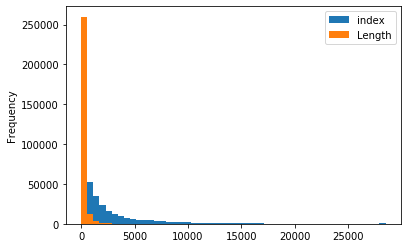

In [300]:
reduced[reduced["Length"].apply(lambda x: x < 5000)].plot(kind="hist", bins=50)

In [307]:
len(reduced[reduced["Length"].apply(lambda x: x < 5000)]) / len(reduced)*100

99.73424735053204

In [332]:
list(range(20))[10::-1]

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

In [347]:
reduced

,index,Content,Author,Words,Length
0,0,- MVC-010S.JPG\n - MVC-007S.JPG\n - MVC-008S....,dickson-s,"[MVC, 010S, JPG, MVC, 007S, JPG, MVC, 008S, JP...",15
1,1,- MVC-004F.JPG\n - MVC-002F.JPG\n - MVC-003F....,dickson-s,"[MVC, 004F, JPG, MVC, 002F, JPG, MVC, 003F, JP...",12
2,4,- MVC-016S.JPG\n - MVC-012S.JPG\n - MVC-013S....,dickson-s,"[MVC, 016S, JPG, MVC, 012S, JPG, MVC, 013S, JP...",18
3,7,I would assume so.,dickson-s,"[I, would, assume]",3
4,8,"Cary, \n\nAttached are executable GISB and Mas...",dickson-s,"[Cary, Attached, executable, GISB, Master, Fir...",12
...,...,...,...,...,...
279202,569,\n\n> -----Original Message-----\n> From:\tCRC...,platter-p,"[Original, Message, From, CRCommunications, Se...",466
279203,570,"Date: Thursday, January 24, 2002\n\nLocation: ...",platter-p,"[Date, Thursday, January, 24, 2002, Location, ...",87
279204,571,\nDavid Grant has assembled a team to work on ...,platter-p,"[David, Grant, assembled, team, work, gatherin...",29
279205,572,\t\tISO Market Participants:\n\n\t\tAs indicat...,platter-p,"[ISO, Market, Participants, As, indicated, Dec...",208


In [346]:
reduced = reduced[reduced["Length"].apply(lambda x: x < 3000)]
.swifter.apply(
    lambda x: sorted(
        {word: lst.count(word) for word in x["Words"]}.items(),
         key = lambda item: item[1]
    )[10::-1], axis=1
)

KeyboardInterrupt: 

In [322]:
reduced[reduced["Length"].apply(lambda x: x < 3000)]["Words"].swifter.apply(
    lambda x: ((word, count) for word, count in {word: x.count(word) for word in x}.items()))

KeyboardInterrupt: 

In [358]:
import json
abs_start = start = time.time()
for idx, auth in enumerate(reduced["Author"].unique()):
    lst = reduced[reduced.apply(lambda x:
        (x["Author"]== auth) & (x["Length"]< 3000), axis=1)
    ]["Words"].sum()
    dct = {word: lst.count(word) for word in lst}
    print(f"{idx+1}. {auth} took", round(time.time() -start, 2), "seconds")
    with open(join(path, f"{auth}.word_dict.json"), "w") as file:
        file.write(json.dumps(dct))
    start = time.time()
    del(lst, dct)
print(f"Total took", round(time.time() -abs_start, 2) /60, "minutes")

1. dickson-s took 10.52 seconds
2. stclair-c took 968.98 seconds
3. guzman-m took 1189.6 seconds
4. kuykendall-t took 313.48 seconds
5. saibi-e took 555.44 seconds
6. keiser-k took 341.07 seconds
7. harris-s took 131.46 seconds


KeyboardInterrupt: 

In [359]:
reduced["Author"].unique()[:10]

array(['dickson-s', 'stclair-c', 'guzman-m', 'kuykendall-t', 'saibi-e',
       'keiser-k', 'harris-s', 'kean-s', 'lavorato-j', 'campbell-l'],
      dtype=object)

In [374]:
reduced[reduced["Author"]=='kean-s'].sort_values("Length", ascending=False)#.loc[7434,"Content"]

,index,Content,Author,Words,Length
8246,1512,Please see the following articles:\n\nEnergy I...,kean-s,"[Please, see, following, articles, Energy, Ins...",19800
12129,14976,A full list of articles will be sent on Monday...,kean-s,"[A, full, list, articles, sent, Monday, initia...",19553
6987,247,"Please see the attached articles:\n\nSac Bee, ...",kean-s,"[Please, see, attached, articles, Sac, Bee, Mo...",19515
7434,694,"Please see the following articles:\n\nSac Bee,...",kean-s,"[Please, see, following, articles, Sac, Bee, T...",18577
12369,15225,------- Failure Reasons --------\n\nUser not...,kean-s,"[Failure, Reasons, User, listed, public, Name,...",17486
...,...,...,...,...,...
9007,2283,Meeting,kean-s,[Meeting],1
9589,2869,", Palmer",kean-s,[Palmer],1
11654,14437,fwefewfewew,kean-s,[fwefewfewew],1
11660,14446,final\n\n\n,kean-s,[final],1


In [363]:
reduced[reduced["Author"]=='kean-s']["Words"].sum()

['0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0'

In [235]:
sorted(dct["dickson-s"].items(), key=lambda item: item[1])[::-1]

[('Stacy', 304),
 ('I', 298),
 ('ECT', 293),
 ('2001', 182),
 ('HOU', 166),
 ('Dickson', 164),
 ('com', 155),
 ('E', 151),
 ('Enron', 140),
 ('To', 122),
 ('Subject', 119),
 ('PM', 100),
 ('04', 98),
 ('cc', 92),
 ('The', 91),
 ('Agreement', 87),
 ('NUI', 83),
 ('Please', 81),
 ('AM', 76),
 ('01', 75),
 ('ENRON', 74),
 ('please', 69),
 ('enron', 68),
 ('know', 67),
 ('doc', 66),
 ('Master', 62),
 ('agreement', 61),
 ('03', 60),
 ('Forwarded', 58),
 ('20', 57),
 ('attached', 55),
 ('enovate', 55),
 ('review', 54),
 ('comments', 54),
 ('3', 53),
 ('If', 52),
 ('changes', 52),
 ('Attached', 52),
 ('Transaction', 51),
 ('05', 49),
 ('06', 49),
 ('Corp', 49),
 ('1', 48),
 ('Gregg', 48),
 ('Thanks', 47),
 ('Firm', 47),
 ('shall', 43),
 ('let', 43),
 ('2', 42),
 ('need', 42),
 ('We', 41),
 ('DSL', 40),
 ('09', 39),
 ('11', 39),
 ('Energy', 39),
 ('GISB', 39),
 ('credit', 38),
 ('call', 38),
 ('Gas', 37),
 ('Mark', 37),
 ('would', 37),
 ('version', 35),
 ('10', 34),
 ('4', 34),
 ('ENA', 33),
 

### Tokenized

In [11]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
tokenizer = RegexpTokenizer(r'\w+')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/becode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
all_mails["Words"] = all_mails["Content"].swifter.apply(lambda x: 
    [w for w in tokenizer.tokenize(x) if w not in stop_words])

In [9]:
#all_mails.to_csv("/media/becode/3D_House/Enron_CSV/all_mails.csv")

In [12]:
kaminski = all_mails[all_mails["X-Origin"]=="Kaminski-V"]
kaminski.to_csv("kaminski.csv")

In [16]:
kaminski["Words"] = kaminski["Content"].swifter.apply(lambda x: 
    [w for w in tokenizer.tokenize(x) if w not in stop_words])
kaminski.to_csv("kaminski_words.csv")

/home/becode/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
kaminski["VecSum"] = kaminski["Words"].swifter.apply(lambda x: sum(sum(vectorize(x))))

/home/becode/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
kaminski.reset_index(drop=True, inplace=True)

In [27]:
len(kaminski[kaminski["Content"] == kaminski.loc[0, "Content"]])

5

In [55]:
kaminski[kaminski["VecSum"].apply(lambda x:x==-24.686839166097343)]

,Content,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,Words,VecSum
449,FYI\n\nVince\n,<11554157.1075856349828.JavaMail.evans@thyme>,"Fri, 15 Sep 2000 09:19:00 -0700 (PDT)",vince.kaminski@enron.com,steven.leppard@enron.com,Weather presentation,1.0,text/plain; charset=us-ascii,7bit,Vince J Kaminski,Steven Leppard,NaN,NaN,\Vincent_Kaminski_Jun2001_2\Notes Folders\Disc...,Kaminski-V,vkamins.nsf,"[FYI, Vince]",-24.686839
2794,FYI\n\nVince\n\n,<3611294.1075856346072.JavaMail.evans@thyme>,"Fri, 25 Aug 2000 08:21:00 -0700 (PDT)",vince.kaminski@enron.com,"steven.leppard@enron.com, grant.masson@enron.com",Re-Regulation?,1.0,text/plain; charset=us-ascii,7bit,Vince J Kaminski,"Steven Leppard, Grant Masson",NaN,NaN,\Vincent_Kaminski_Jun2001_2\Notes Folders\Disc...,Kaminski-V,vkamins.nsf,"[FYI, Vince]",-24.686839
3685,"Phelim,\n\nFYI\n\nVince\n",<16635934.1075856829397.JavaMail.evans@thyme>,"Fri, 26 May 2000 02:17:00 -0700 (PDT)",vince.kaminski@enron.com,pboyle@uwaterloo.ca,Itinerary,1.0,text/plain; charset=us-ascii,7bit,Vince J Kaminski,pboyle@uwaterloo.ca,Vince J Kaminski,NaN,\Vincent_Kaminski_Jun2001_7\Notes Folders\Disc...,Kaminski-V,vkamins.nsf,"[Phelim, FYI, Vince]",-24.686839
7336,"Phelim,\n\nFYI\n\nVince\n",<27148118.1075856927873.JavaMail.evans@thyme>,"Fri, 26 May 2000 02:17:00 -0700 (PDT)",vince.kaminski@enron.com,pboyle@uwaterloo.ca,Itinerary,1.0,text/plain; charset=us-ascii,7bit,Vince J Kaminski,pboyle@uwaterloo.ca,Vince J Kaminski,NaN,\Vincent_Kaminski_Jun2001_8\Notes Folders\Sent,Kaminski-V,vkamins.nsf,"[Phelim, FYI, Vince]",-24.686839
8040,FYI\n\nVince\n\n,<13735023.1075856486177.JavaMail.evans@thyme>,"Fri, 25 Aug 2000 08:21:00 -0700 (PDT)",vince.kaminski@enron.com,"steven.leppard@enron.com, grant.masson@enron.com",Re-Regulation?,1.0,text/plain; charset=us-ascii,7bit,Vince J Kaminski,"Steven Leppard, Grant Masson",NaN,NaN,\Vincent_Kaminski_Jun2001_3\Notes Folders\Sent,Kaminski-V,vkamins.nsf,"[FYI, Vince]",-24.686839
9139,FYI\n\nVince\n,<19437410.1075856483820.JavaMail.evans@thyme>,"Fri, 15 Sep 2000 09:19:00 -0700 (PDT)",vince.kaminski@enron.com,steven.leppard@enron.com,Weather presentation,1.0,text/plain; charset=us-ascii,7bit,Vince J Kaminski,Steven Leppard,NaN,NaN,\Vincent_Kaminski_Jun2001_3\Notes Folders\Sent,Kaminski-V,vkamins.nsf,"[FYI, Vince]",-24.686839
11979,"Phelim,\n\nFYI\n\nVince\n",<17145976.1075857038820.JavaMail.evans@thyme>,"Fri, 26 May 2000 02:17:00 -0700 (PDT)",vince.kaminski@enron.com,pboyle@uwaterloo.ca,Itinerary,1.0,text/plain; charset=us-ascii,7bit,Vince J Kaminski,pboyle@uwaterloo.ca,Vince J Kaminski,NaN,\Vincent_Kaminski_Jun2001_9\Notes Folders\Conf...,Kaminski-V,vkamins.nsf,"[Phelim, FYI, Vince]",-24.686839
13633,FYI\n\n\nVince,<32105560.1075863431438.JavaMail.evans@thyme>,"Wed, 18 Jul 2001 10:19:07 -0700 (PDT)",j.kaminski@enron.com,a..roberts@enron.com,CERA report,1.0,text/plain; charset=us-ascii,7bit,"Kaminski, Vince J </O=ENRON/OU=NA/CN=RECIPIENT...","Roberts, Mike A. </O=ENRON/OU=NA/CN=RECIPIENTS...",'vkaminski@aol.com',NaN,"\VKAMINS (Non-Privileged)\Kaminski, Vince J\Se...",Kaminski-V,VKAMINS (Non-Privileged).pst,"[FYI, Vince]",-24.686839
16609,FYI\n\nVince,<1749718.1075856732820.JavaMail.evans@thyme>,"Thu, 25 May 2000 10:52:00 -0700 (PDT)",vince.kaminski@enron.com,pboyle@uwaterloo.c,Itinerary,1.0,text/plain; charset=us-ascii,7bit,Vince J Kaminski,pboyle@uwaterloo.c,Vince J Kaminski,NaN,\Vincent_Kaminski_Jun2001_6\Notes Folders\All ...,Kaminski-V,vkamins.nsf,"[FYI, Vince]",-24.686839
18792,FYI\n\nVince\n,<15090923.1075856288556.JavaMail.evans@thyme>,"Fri, 15 Sep 2000 09:19:00 -0700 (PDT)",vince.kaminski@enron.com,steven.leppard@enron.com,Weather presentation,1.0,text/plain; charset=us-ascii,7bit,Vince J Kaminski,Steven Leppard,NaN,NaN,\Vincent_Kaminski_Jun2001_1\Notes Folders\All ...,Kaminski-V,vkamins.nsf,"[FYI, Vince]",-24.686839


In [52]:
kaminski["VecSum"].value_counts().idxmax()

-24.686839166097343

In [30]:
kaminski["VecSum"].value_counts()

-24.686839      15
 313.678143     14
 11.217431      13
 86.714006      10
 765.729857      9
                ..
 97.877437       1
 163.751638      1
 782.982897      1
 2491.878084     1
 0.000000        1
Name: VecSum, Length: 9837, dtype: int64

In [28]:
len(kaminski[kaminski["VecSum"] == kaminski.loc[0, "VecSum"]])

5

In [11]:
all_mails["X-Origin"].value_counts()

Kaminski-V      26995
DASOVICH-J      26323
KEAN-S          23621
MANN-K          22414
JONES-T         18598
                ...  
BAILEY-S           26
ERMIS-F            20
KUYKENDALL-T       18
Zufferlie-J         4
DELAINEY-D          1
Name: X-Origin, Length: 259, dtype: int64

In [13]:
import en_core_web_lg
eng = en_core_web_lg.load()
vectorize = lambda x: [eng.vocab[w].vector for w in x]

In [ ]:
start = time.time()

all_mails["Vectors"] = all_mails["Words"].swifter.apply(vectorize)

print("Took", round(time.time() -start, 2), "seconds")

In [67]:
for bar in test:
    if np.array(bar).shape==np.array(test[302]).shape:
        if (np.array(bar) -np.array(test[302])).sum() == 0:
            print("Found")

Found
Found


In [54]:
import numpy as np

In [47]:
all_mails["Words"][all_mails["Words"].apply(lambda x: x==all_mails.loc[106, "Words"])]

106    [Ellen, I, deal, Stacy]
302    [Ellen, I, deal, Stacy]
Name: Words, dtype: object

In [24]:
start = time.time()

all_mails.loc[:10, "Words"].value_counts()

print("Took", round(time.time() -start, 2), "seconds")

Took 0.0 seconds


In [17]:
start = time.time()

all_mails["Content"].apply(lambda x: x==all_mails.loc[100, "Content"]).sum()

print("Took", round(time.time() -start, 2), "seconds")

Took 4.4 seconds


### First and last mail sent

In [128]:
start = time.time()

time_set = pd.DataFrame()
time_set["Who"] = all_mails["X-Origin"].unique()
time_set["First"] = time_set["Who"].apply(lambda x: 
    all_mails[all_mails["X-Origin"] == x]["Date"].min())
time_set["Last"] = time_set["Who"].apply(lambda x: 
    all_mails[all_mails["X-Origin"] == x]["Date"].max())

print("Took", round(time.time() -start, 2), "seconds")

Took 39.84 seconds


In [148]:
time_set.to_csv("time_set.csv")